In [2]:
import numpy as np
import pandas as pd

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df1 = pd.read_csv(r'datasets/exercise.csv')
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [11]:
df2 = pd.read_csv(r'datasets/calories.csv')
df2.head()
print(df1.shape)

(15000, 8)


In [22]:
df = pd.merge(df1, df2, how='outer', on='User_ID')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,10001159,female,67,176.0,74.0,12.0,103.0,39.6,76.0
1,10001607,female,34,178.0,79.0,19.0,96.0,40.6,93.0
2,10005485,female,38,178.0,77.0,14.0,82.0,40.5,49.0
3,10005630,female,39,169.0,66.0,8.0,90.0,39.6,36.0
4,10006441,male,23,169.0,73.0,25.0,102.0,40.7,122.0


### EDA

In [16]:
df.shape

(15000, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
df.isna().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [11]:
df.duplicated().sum()

0

<Axes: >

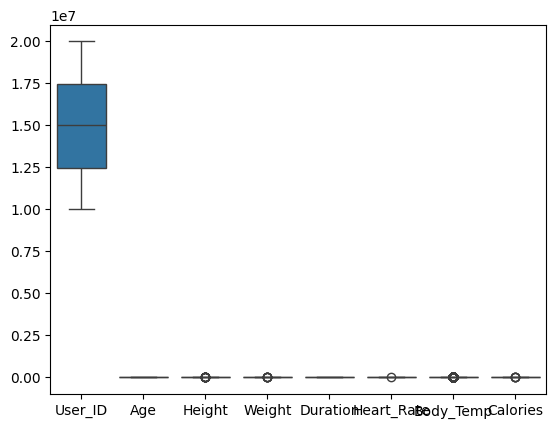

In [12]:
sns.boxplot(df)

### Feature Engineering

In [13]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,10001159,female,67,176.0,74.0,12.0,103.0,39.6,76.0
1,10001607,female,34,178.0,79.0,19.0,96.0,40.6,93.0
2,10005485,female,38,178.0,77.0,14.0,82.0,40.5,49.0
3,10005630,female,39,169.0,66.0,8.0,90.0,39.6,36.0
4,10006441,male,23,169.0,73.0,25.0,102.0,40.7,122.0


In [14]:
df.drop(columns=['User_ID'], axis=1, inplace=True)

In [15]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,female,67,176.0,74.0,12.0,103.0,39.6,76.0
1,female,34,178.0,79.0,19.0,96.0,40.6,93.0
2,female,38,178.0,77.0,14.0,82.0,40.5,49.0
3,female,39,169.0,66.0,8.0,90.0,39.6,36.0
4,male,23,169.0,73.0,25.0,102.0,40.7,122.0


### Data Analysis

In [16]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [17]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [18]:
AV = AutoViz_Class()

Shape of your Data Set loaded: (15000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 1 dupl

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Gender,object,0.000000,0,,,No issue
Age,int64,0.000000,0,20.000000,79.000000,No issue
Height,float64,0.000000,NA,123.000000,222.000000,Column has 14 outliers greater than upper bound (216.50) or lower than lower bound(132.50). Cap them or remove them.
Weight,float64,0.000000,NA,36.000000,132.000000,"Column has 6 outliers greater than upper bound (123.00) or lower than lower bound(27.00). Cap them or remove them., Column has a high correlation with ['Height']. Consider dropping one of them."
Duration,float64,0.000000,NA,1.000000,30.000000,No issue
Heart_Rate,float64,0.000000,NA,67.000000,128.000000,"Column has 1 outliers greater than upper bound (125.50) or lower than lower bound(65.50). Cap them or remove them., Column has a high correlation with ['Duration']. Consider dropping one of them."
Body_Temp,float64,0.000000,NA,37.100000,41.500000,"Column has 369 outliers greater than upper bound (42.10) or lower than lower bound(38.10). Cap them or remove them., Column has a high correlation with ['Duration']. Consider dropping one of them."
Calories,float64,0.000000,NA,1.000000,314.000000,"Column has 4 outliers greater than upper bound (292.50) or lower than lower bound(-119.50). Cap them or remove them., Column has a high correlation with ['Duration', 'Heart_Rate', 'Body_Temp']. Consider dropping one of them."


Number of All Scatter Plots = 21


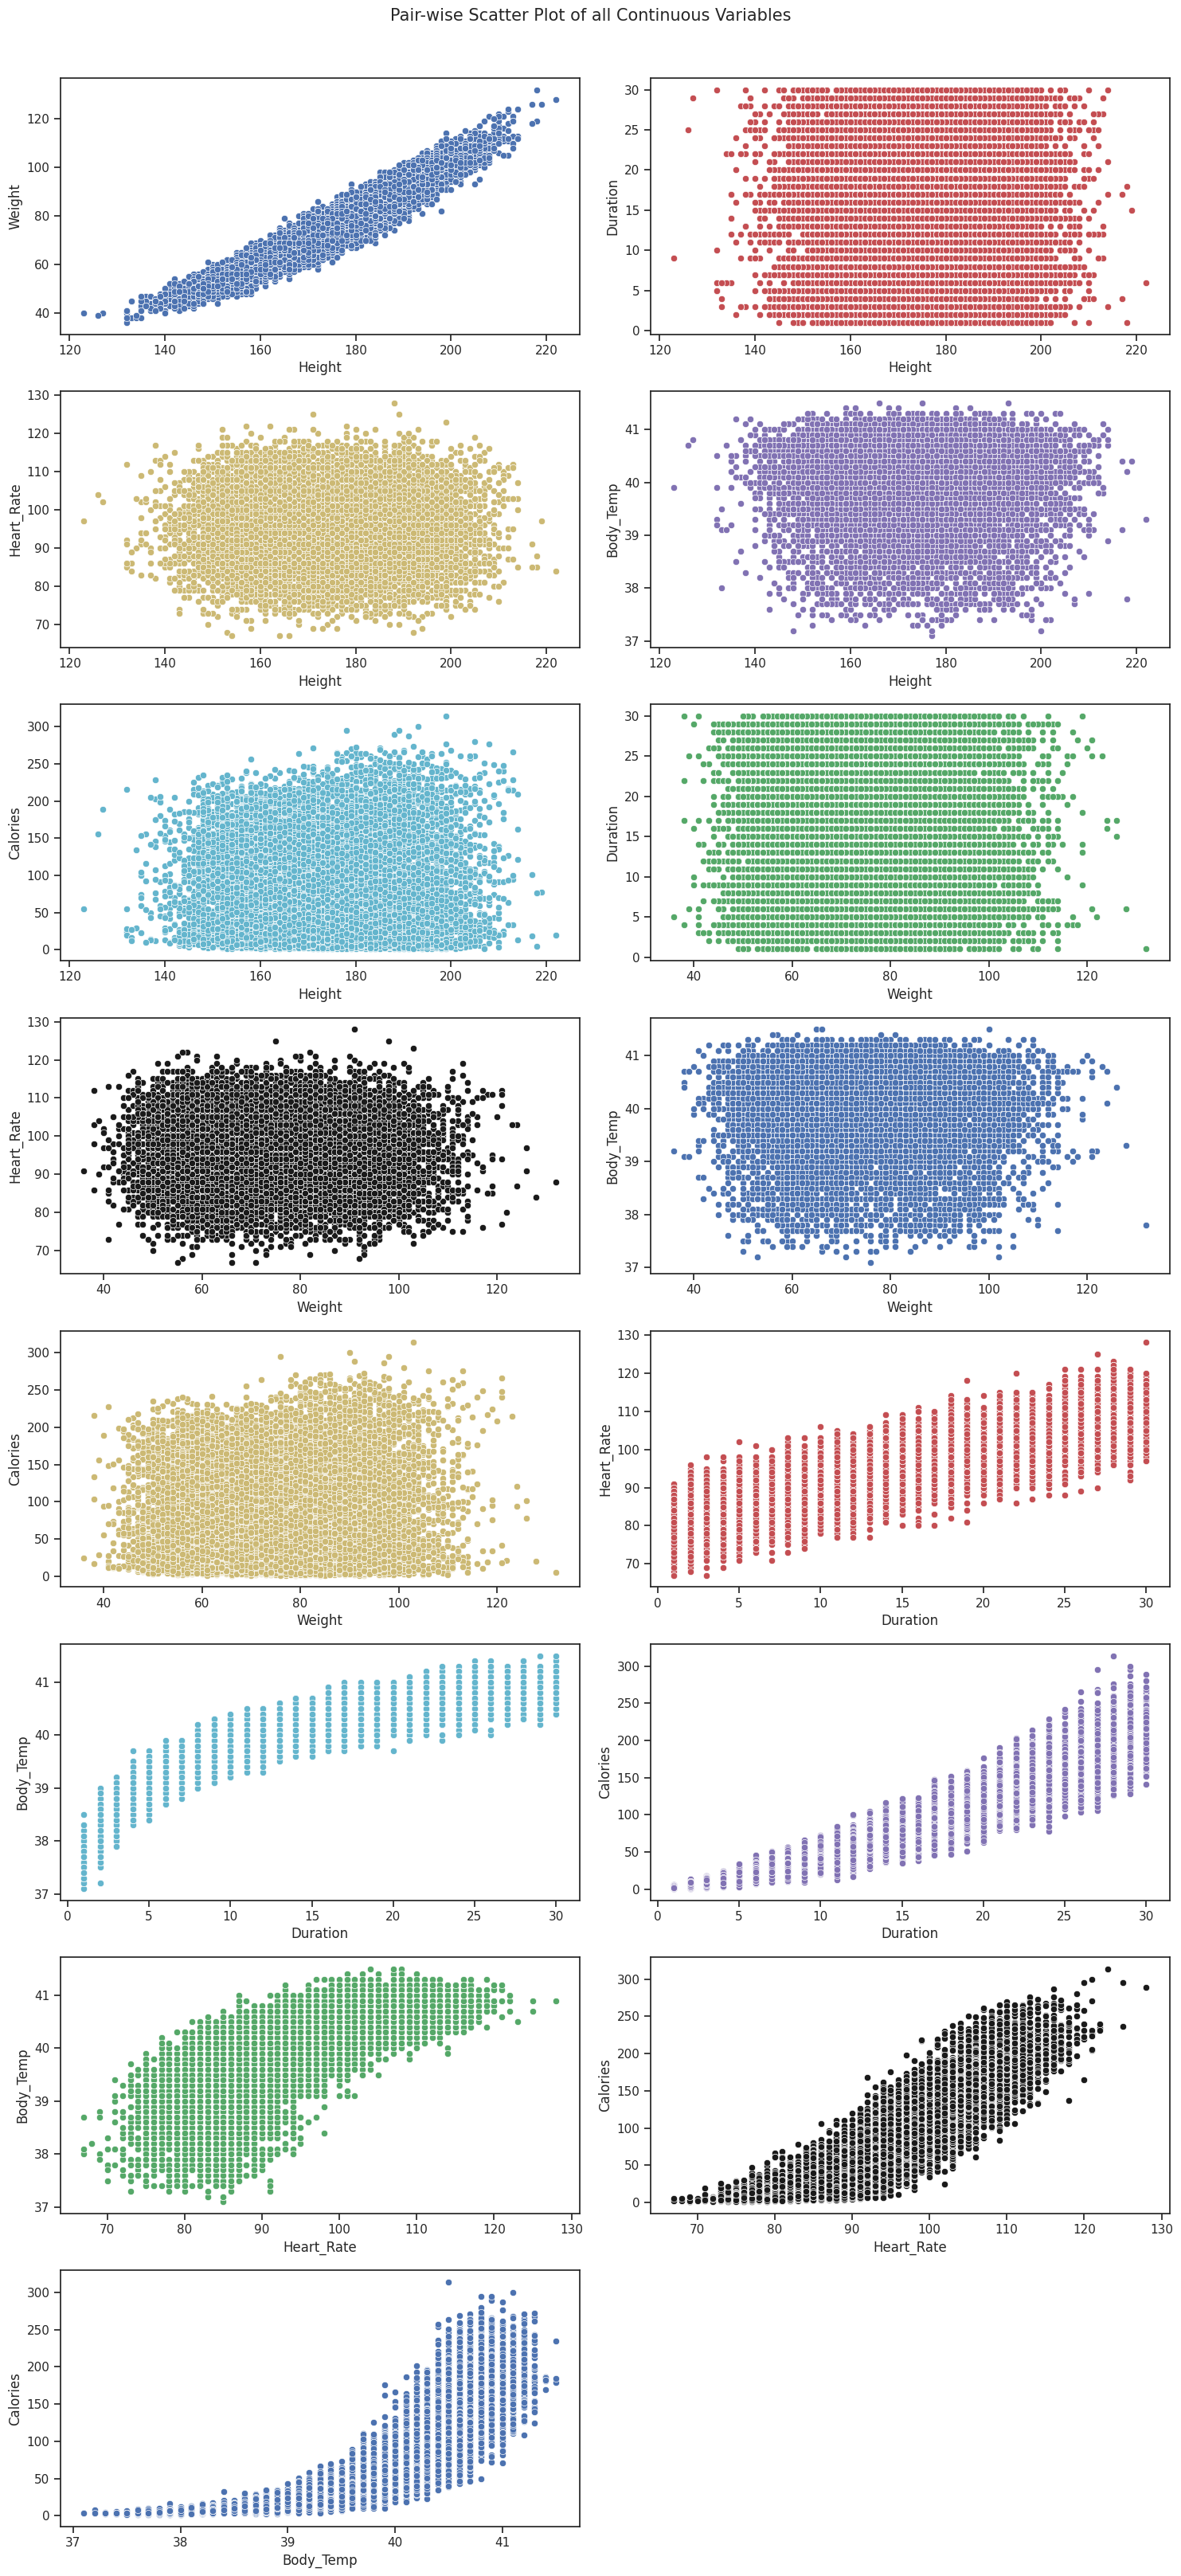

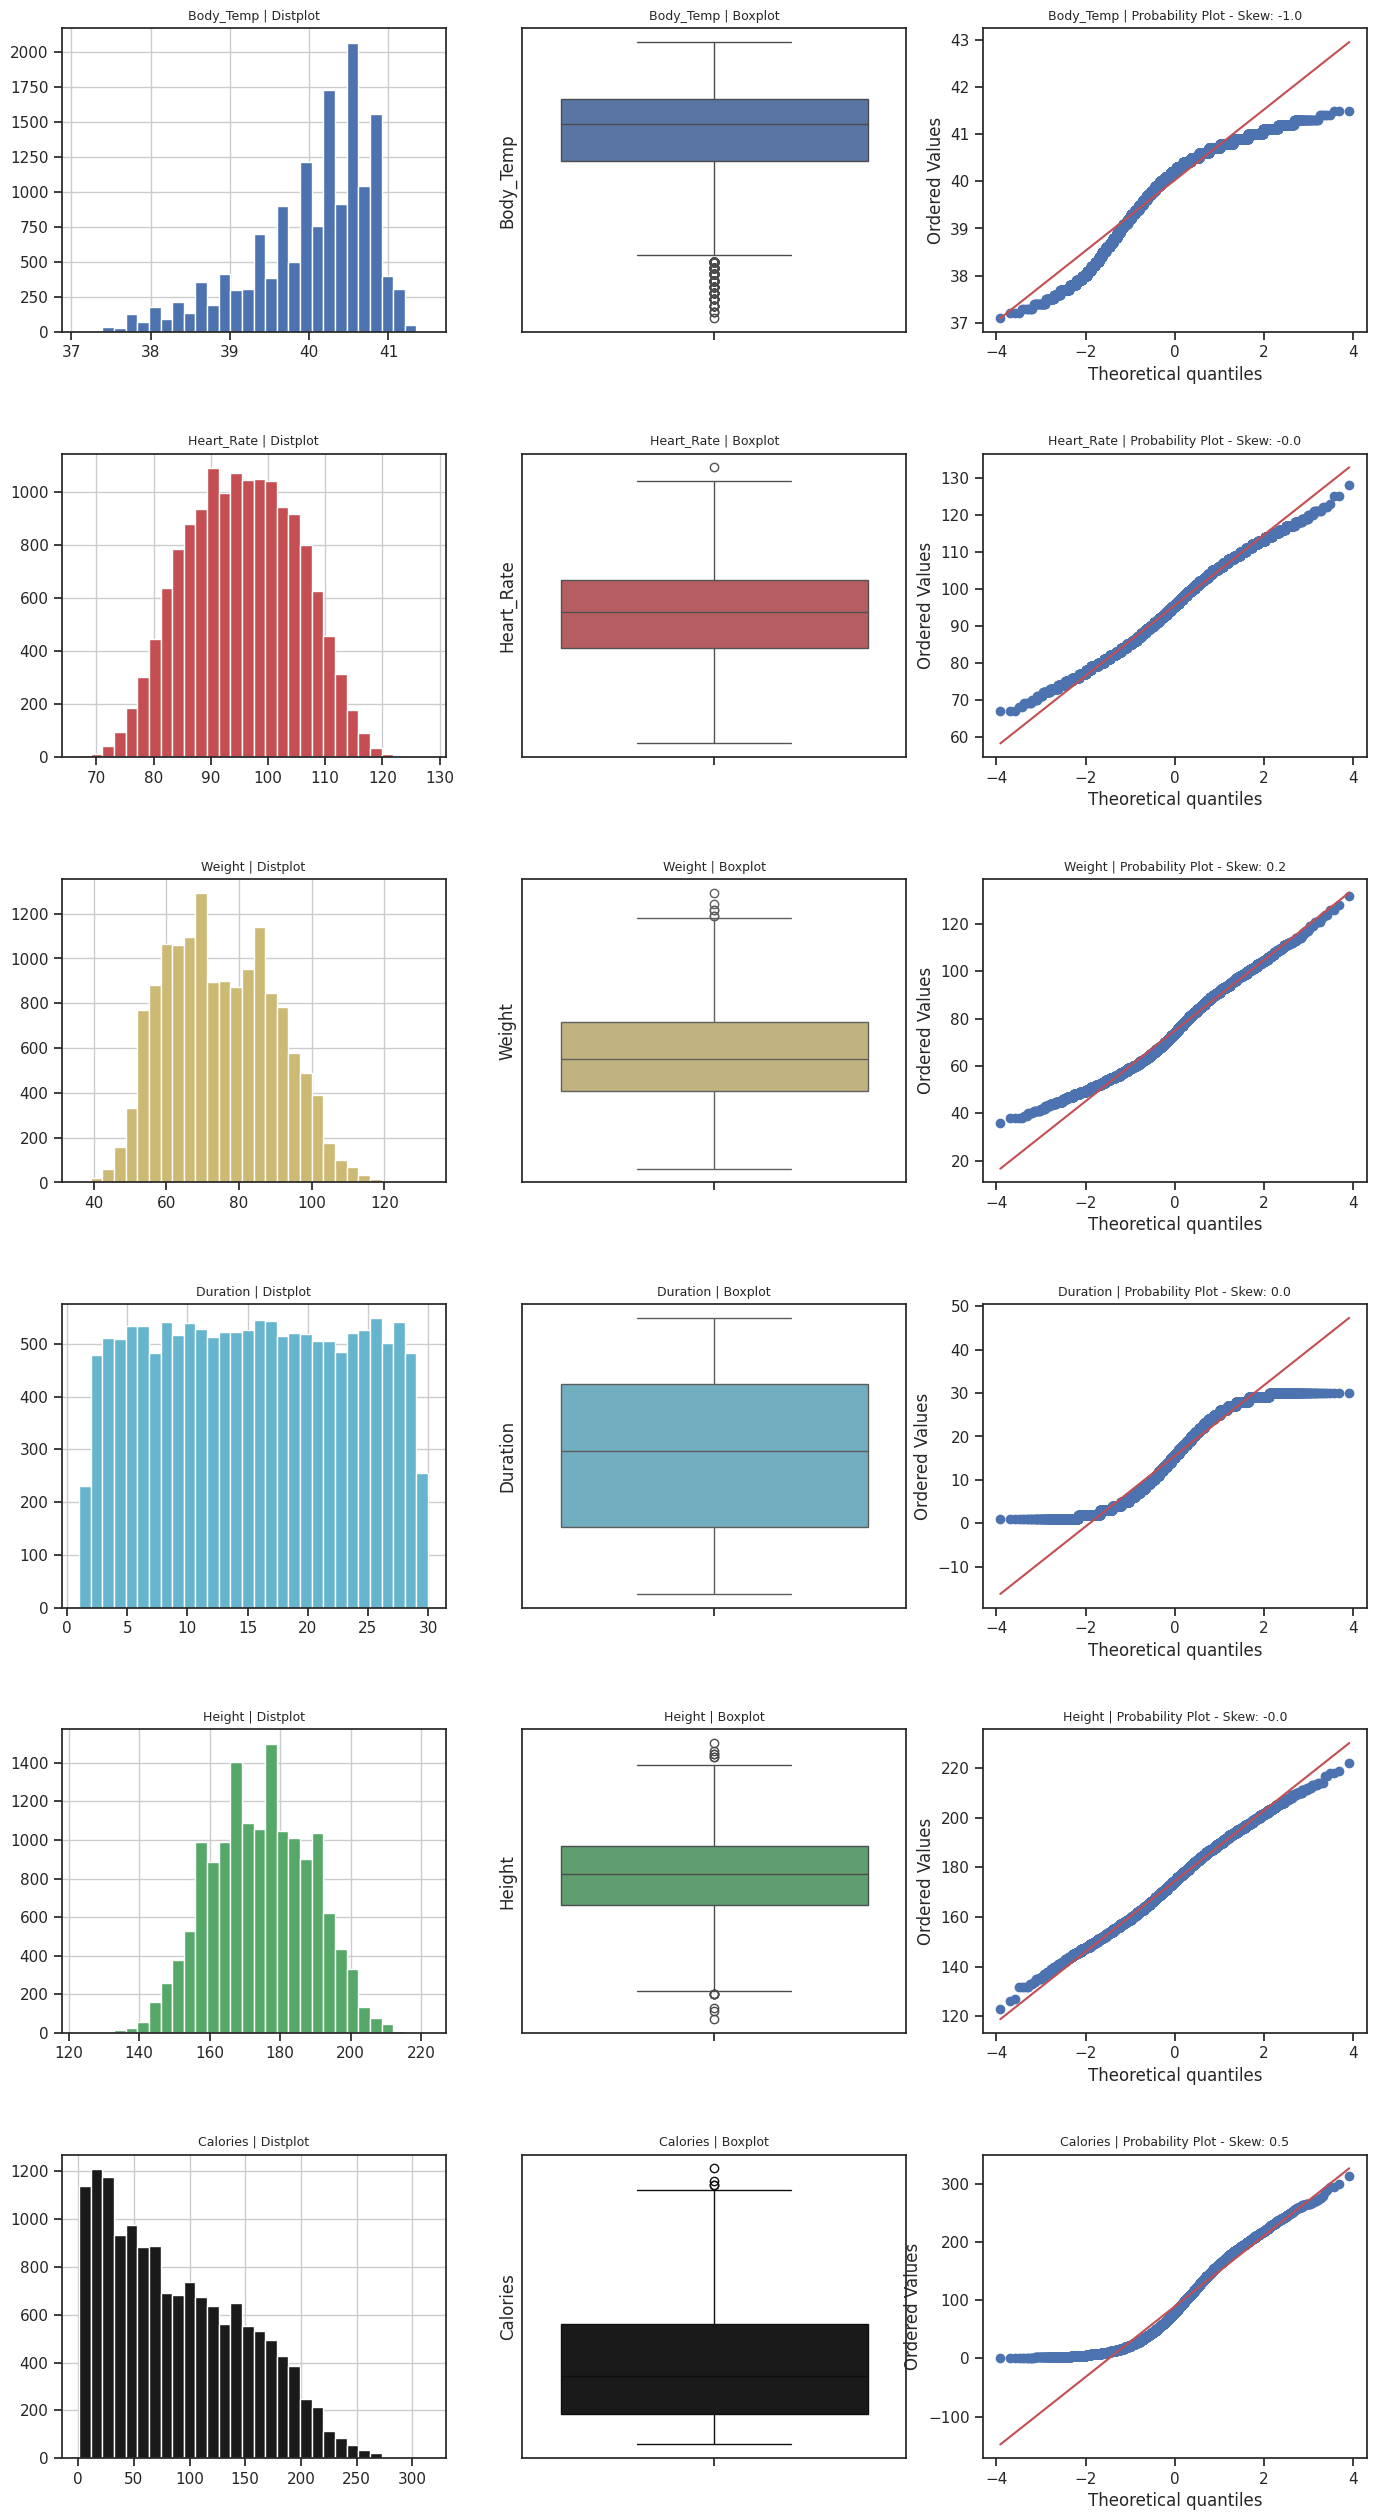

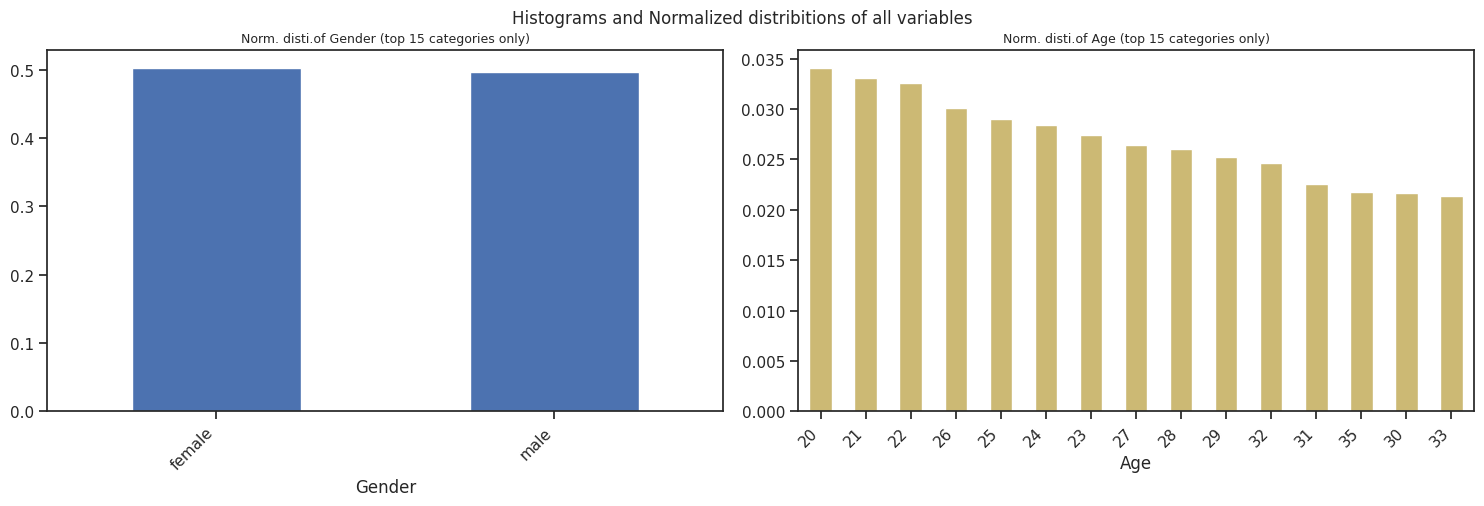

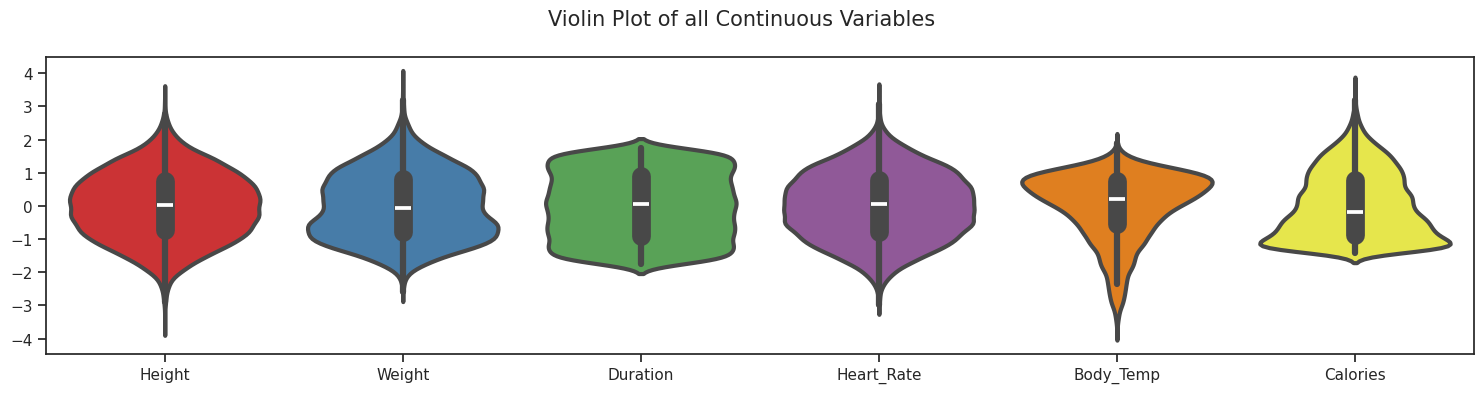

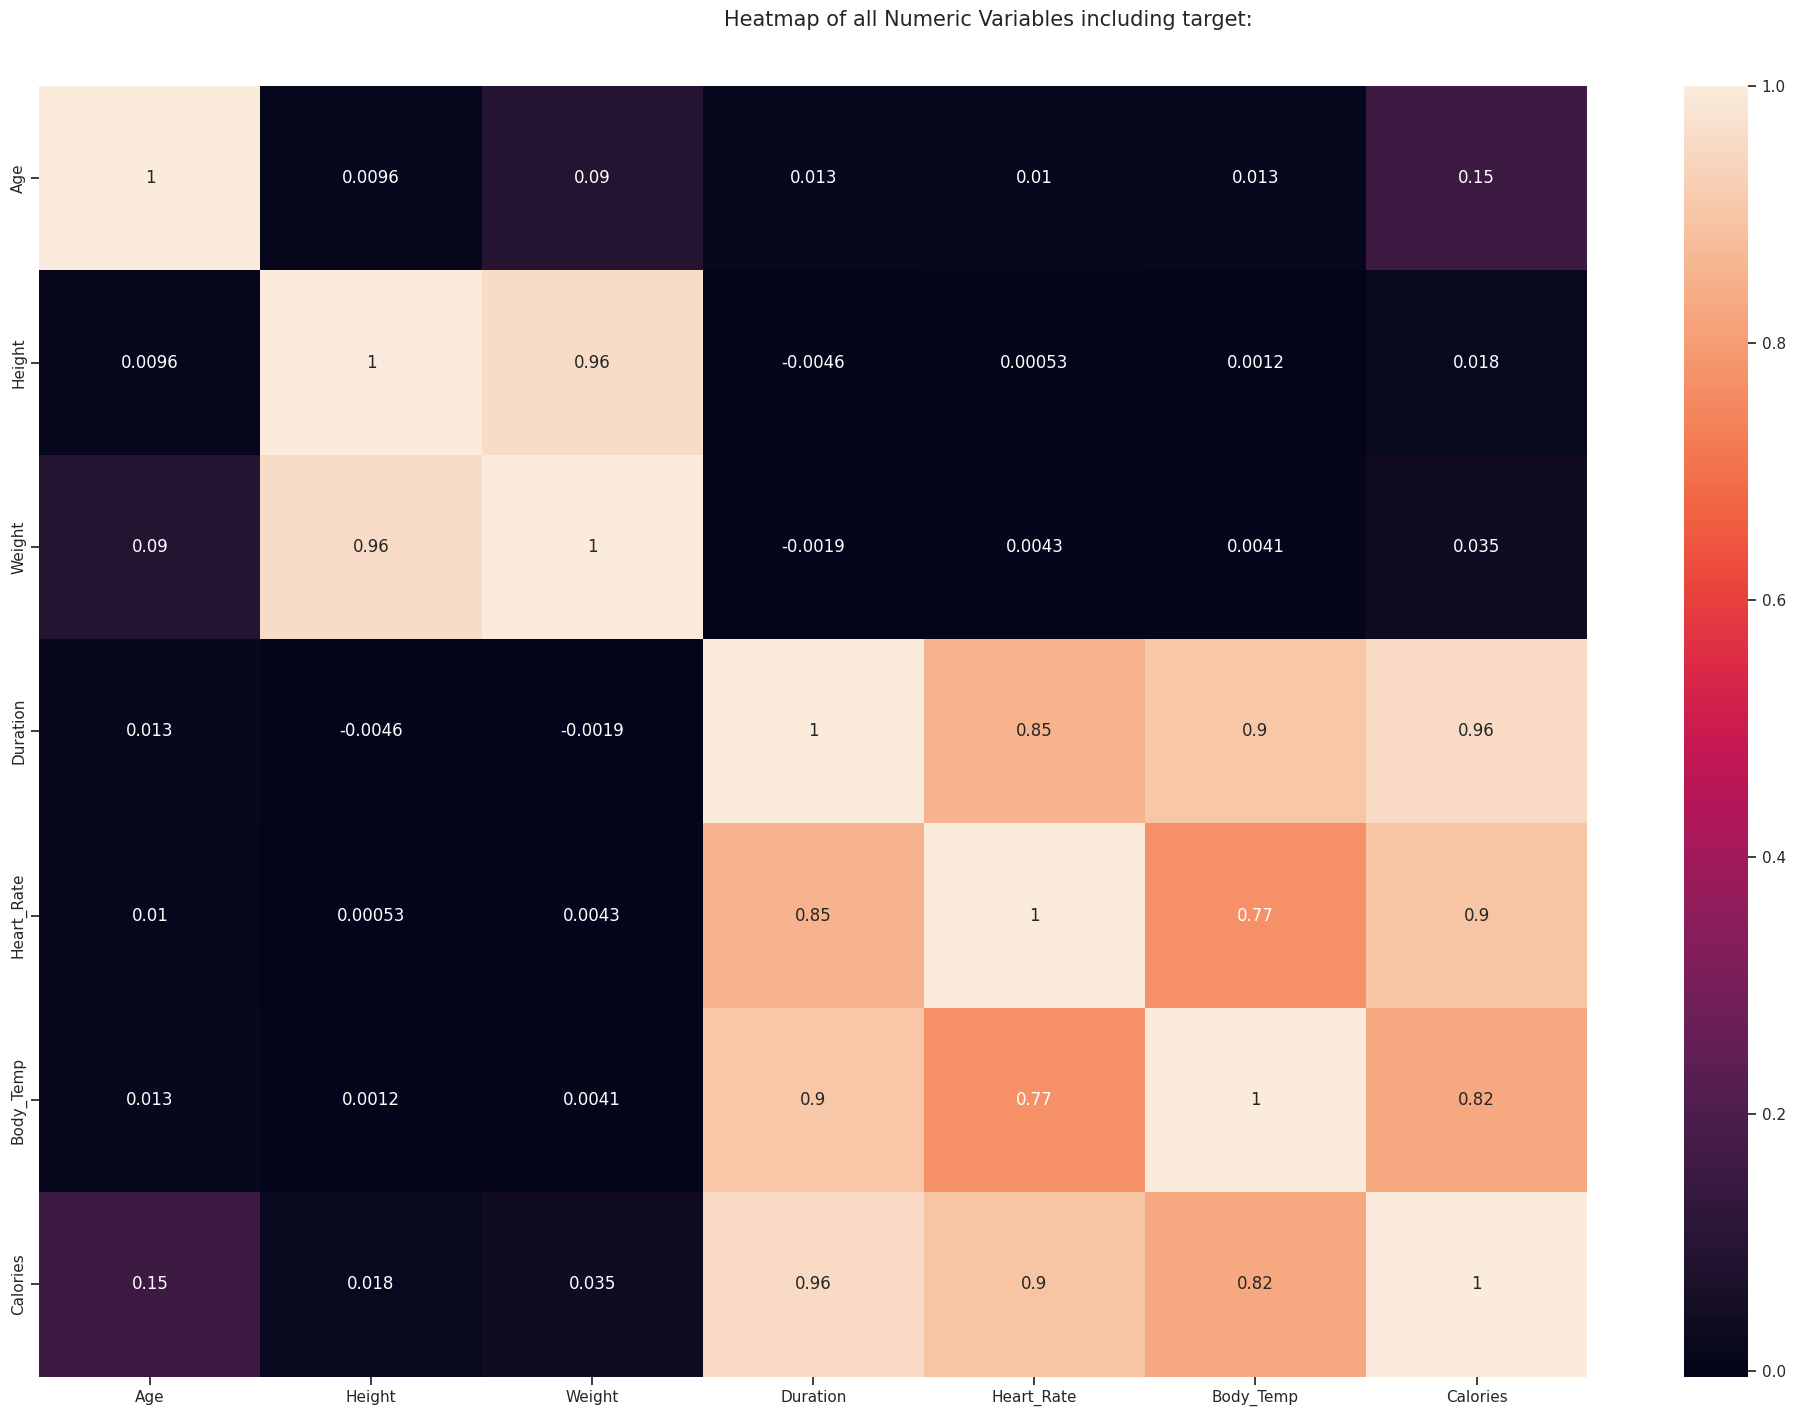

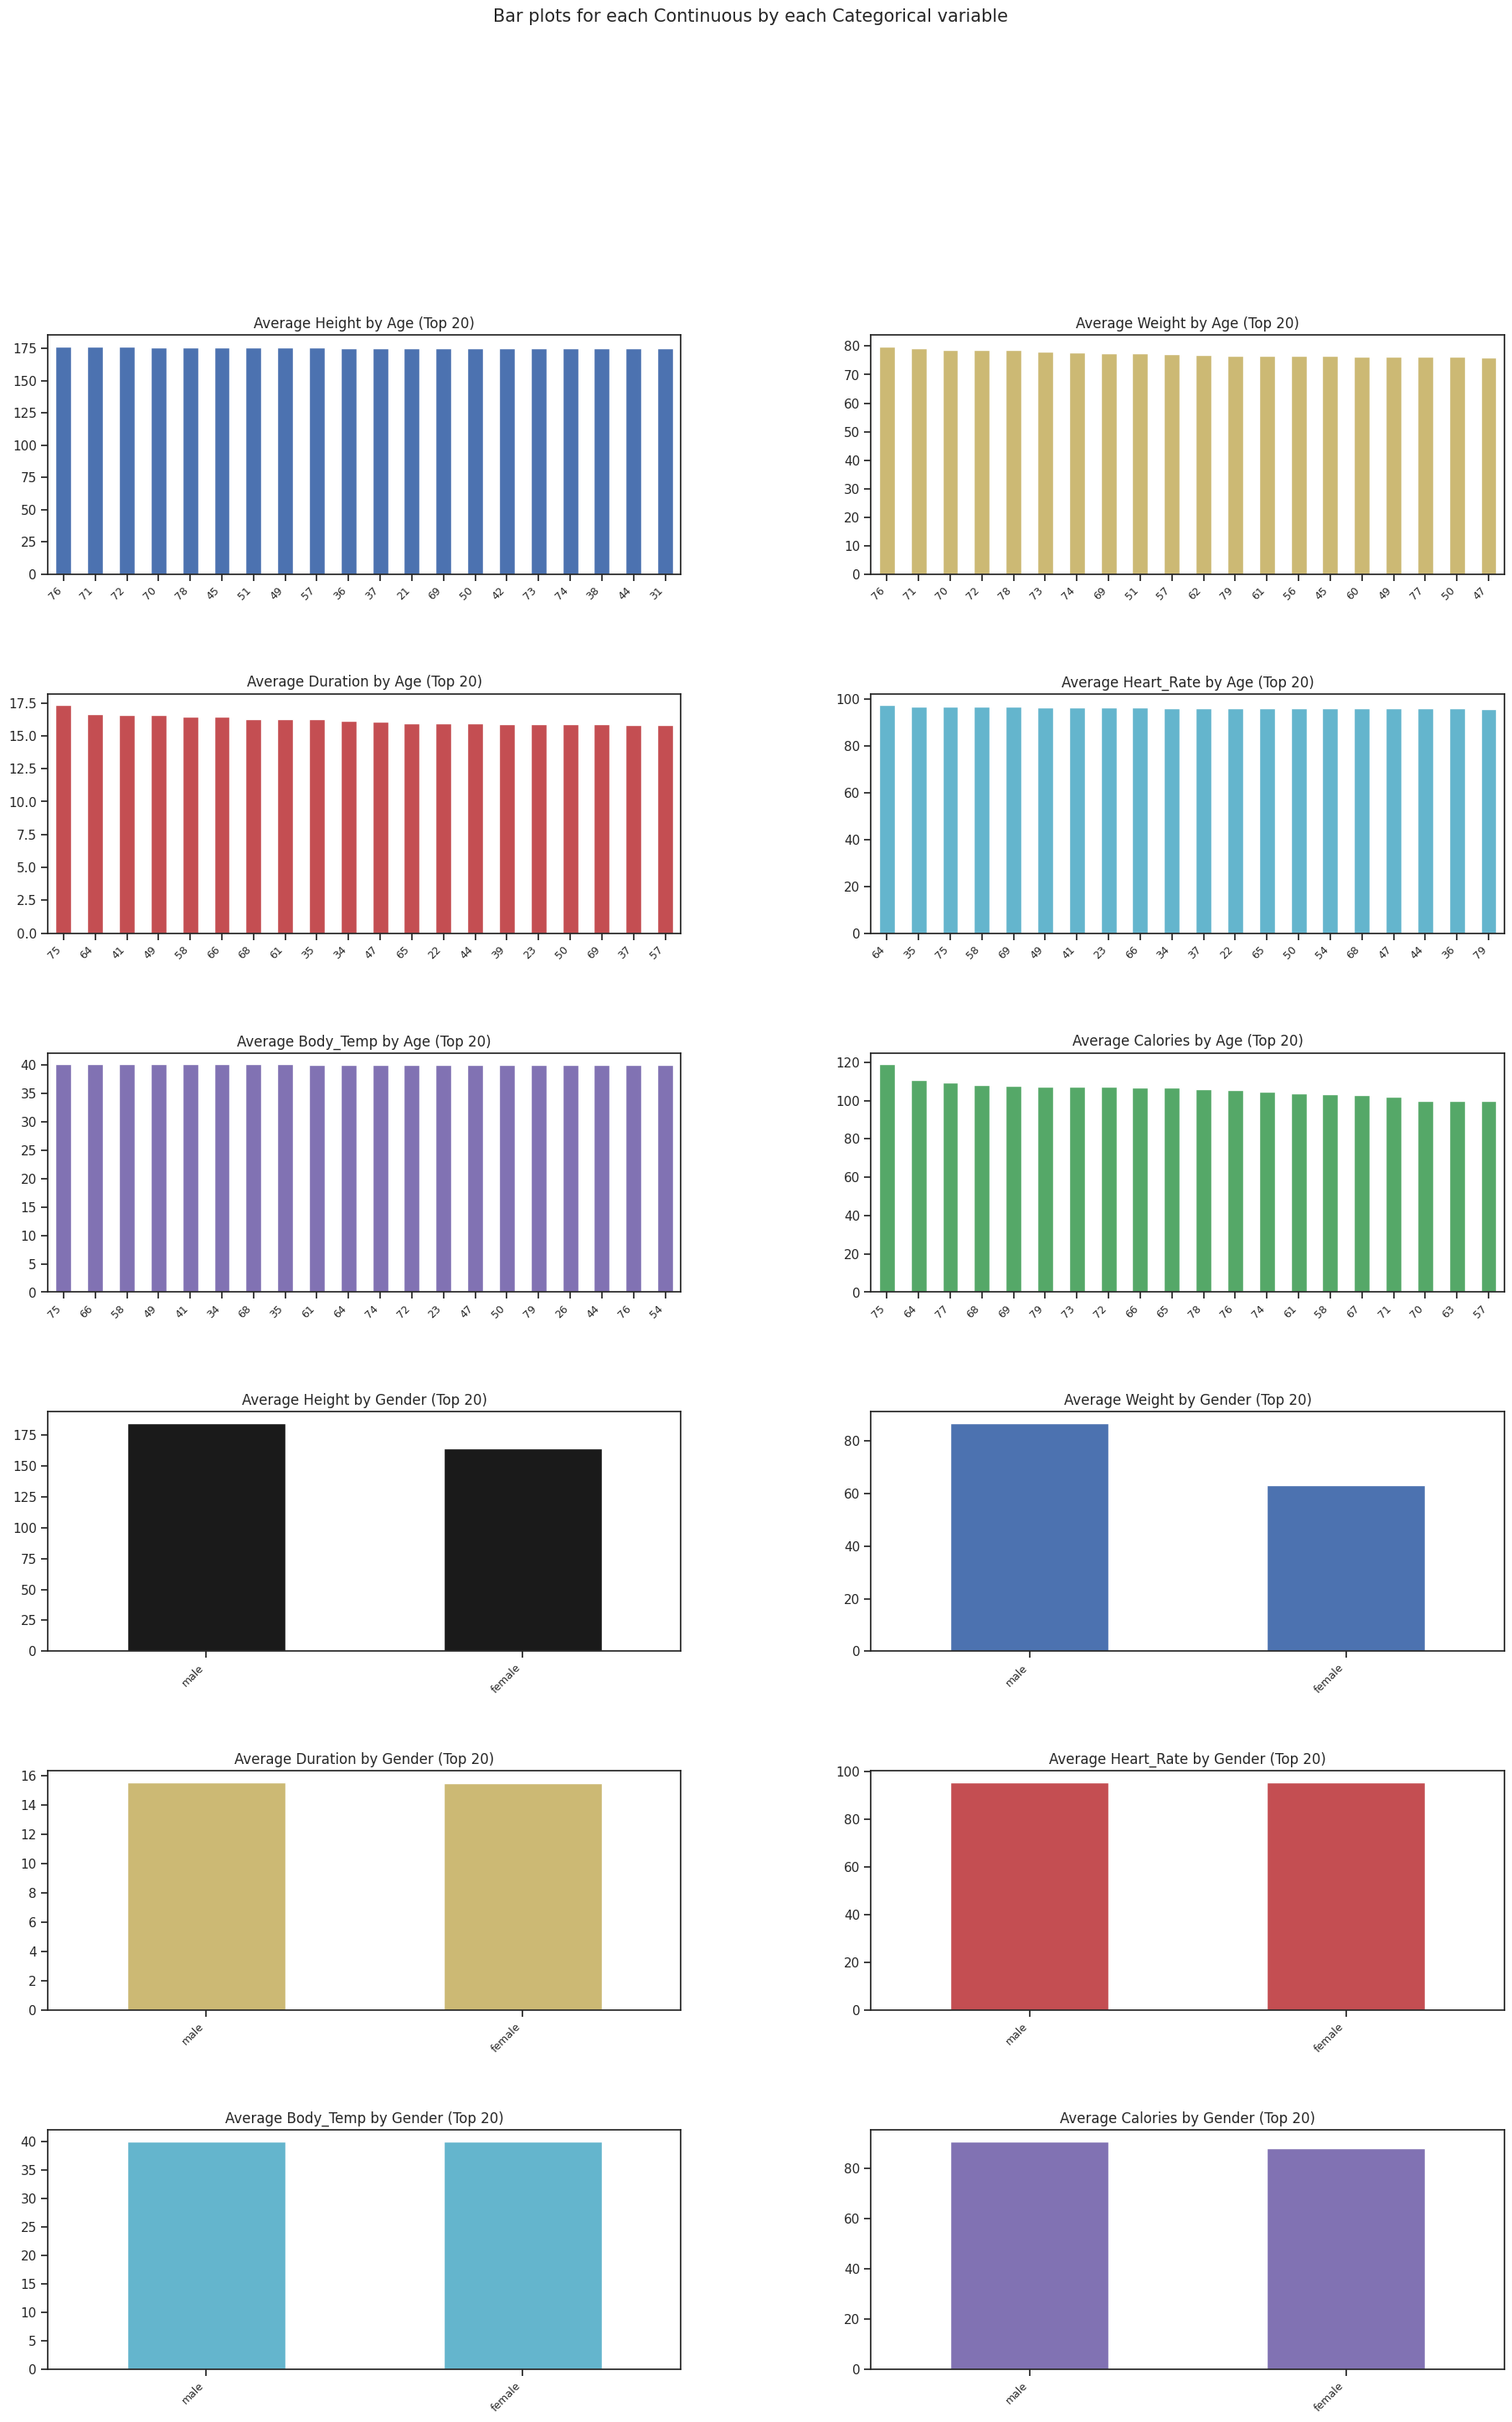

All Plots done
Time to run AutoViz = 20 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [19]:
%matplotlib inline
filename = df

dft = AV.AutoViz(
    filename
)

### Handling Outliers

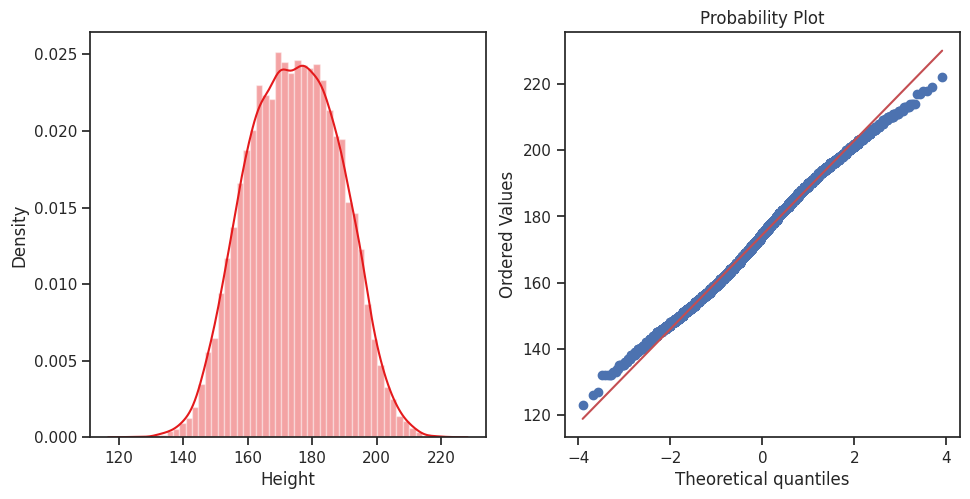

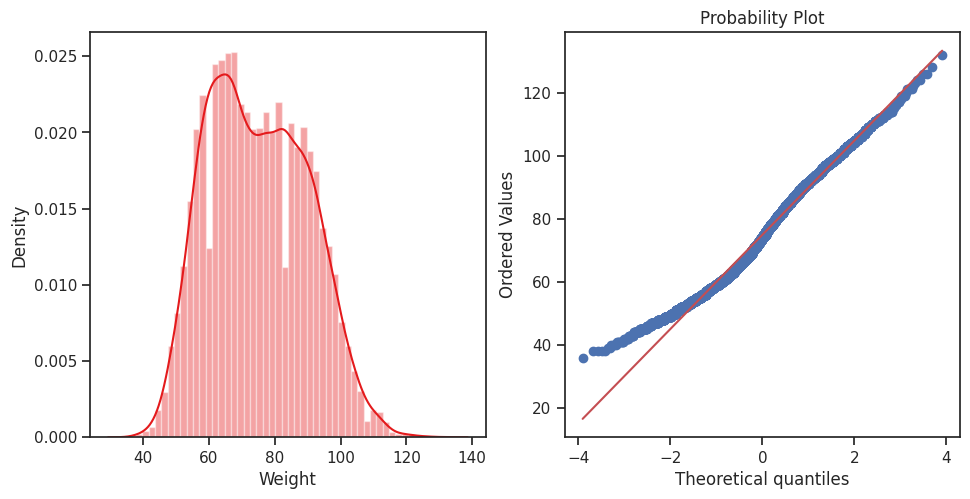

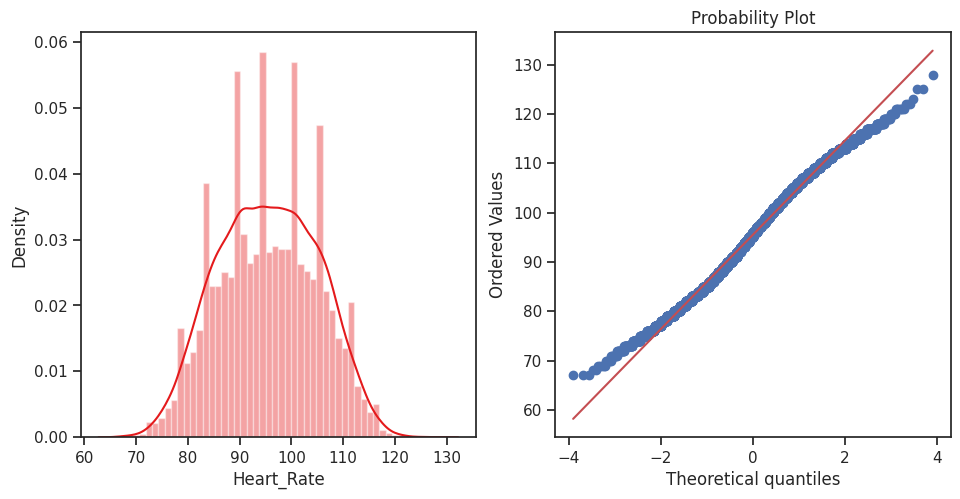

In [20]:
# Height Distribution
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Height'])

plt.subplot(1,2,2)
stats.probplot(df['Height'], dist='norm', plot=plt)
plt.show()

# Weight Distribution
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Weight'])

plt.subplot(1,2,2)
stats.probplot(df['Weight'], dist='norm', plot=plt)
plt.show()

# Heart_Rate
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Heart_Rate'])

plt.subplot(1,2,2)
stats.probplot(df['Heart_Rate'], dist='norm', plot=plt)
plt.show()

Since here these 3 columns that are Height, Weight and Heart Rate follows normal Distribution we will Use #Z -Score Method..


<Axes: >

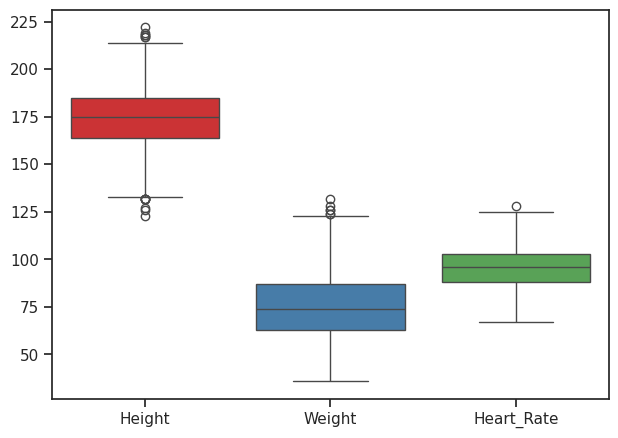

In [21]:
sns.boxplot(df[['Height', 'Weight', 'Heart_Rate']])

#### Height

In [22]:
upper_limit_height = df['Height'].mean() + 3*df['Height'].std()
print("Upper Limit of Height: ", upper_limit_height)

lower_limit_height = df['Height'].mean() - 3*df['Height'].std()
print("Upper Limit of Height: ", lower_limit_height)

Upper Limit of Height:  217.2394741829869
Upper Limit of Height:  131.6907924836798


#### Weight

In [23]:
upper_limit_weight = df['Weight'].mean() + 3*df['Weight'].std()
print("Upper Limit of Weight: ", upper_limit_weight)

lower_limit_weight = df['Weight'].mean() - 3*df['Weight'].std()
print("Upper Limit of Weight: ", lower_limit_weight)

Upper Limit of Weight:  120.07383688440748
Upper Limit of Weight:  29.859896448925845


#### Heart_Rate

In [24]:
upper_limit_heart_rate = df['Heart_Rate'].mean() + 3*df['Heart_Rate'].std()
print("Upper Limit of Heart Rate: ", upper_limit_heart_rate)

lower_limit_heart_rate = df['Heart_Rate'].mean() - 3*df['Heart_Rate'].std()
print("Upper Limit of Heart Rate: ", lower_limit_heart_rate)

Upper Limit of Heart Rate:  124.26851790285097
Upper Limit of Heart Rate:  66.7685487638157


## Capping

In [25]:
df['Height'] = np.where(df['Height']>upper_limit_height, upper_limit_height,

                        np.where(df['Height']<lower_limit_height, lower_limit_height,

                                 df['Height']))

In [26]:
df['Weight'] = np.where(df['Weight']>upper_limit_weight, upper_limit_weight,

                       np.where(df['Weight']<lower_limit_weight, lower_limit_weight,

                               df['Weight']))

In [27]:
df['Heart_Rate'] = np.where(df['Heart_Rate']>upper_limit_heart_rate, upper_limit_heart_rate,

                           np.where(df['Heart_Rate']<lower_limit_heart_rate, lower_limit_heart_rate,

                                   df['Heart_Rate']))

<Axes: >

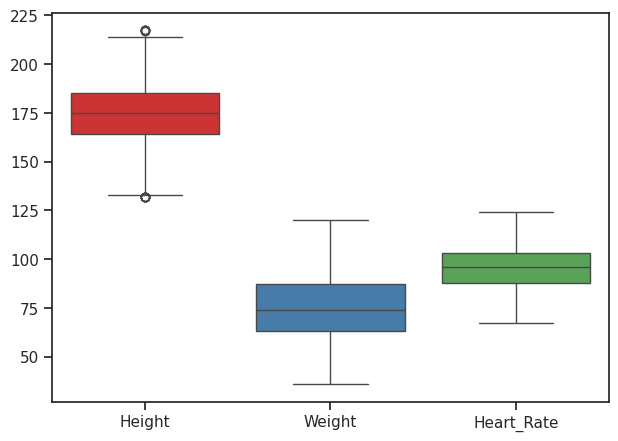

In [28]:
sns.boxplot(df[['Height', 'Weight', 'Heart_Rate']])

<Axes: ylabel='Body_Temp'>

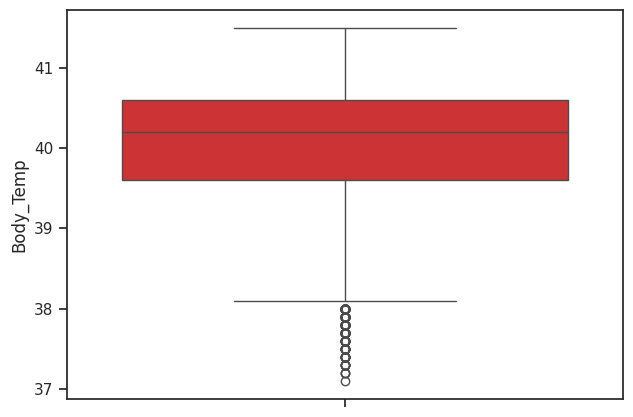

In [29]:
sns.boxplot(df['Body_Temp'])

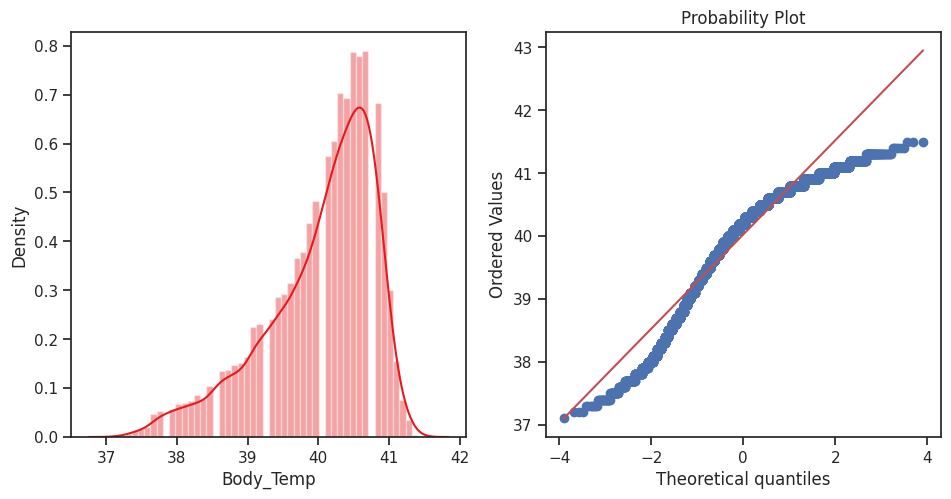

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Body_Temp'])

plt.subplot(1,2,2)
stats.probplot(df['Body_Temp'], dist='norm', plot=plt)
plt.show()

Since it is not Normally Distributed we will use IQR Method


In [31]:
# Finding IQR:
percentile_75_bt = df['Body_Temp'].quantile(0.75)
print("75 Percentile of Body Temp: ", percentile_75_bt)

percentile_25_bt = df['Body_Temp'].quantile(0.25)
print("25 Percentile of Body Temp: ", percentile_25_bt)

iqr = (percentile_75_bt - percentile_25_bt)
print("IQR: ", iqr)

75 Percentile of Body Temp:  40.6
25 Percentile of Body Temp:  39.6
IQR:  1.0


In [32]:
# Finding Upper Limit and Lower Limit:
upper_limit = percentile_75_bt + 1.5*iqr
print("Upper Limit of Body Temp: ", upper_limit)

lower_limit = percentile_25_bt - 1.5*iqr
print("Lower Limit of Body Temp: ", lower_limit)

Upper Limit of Body Temp:  42.1
Lower Limit of Body Temp:  38.1


In [33]:
# Capping:
df['Body_Temp'] = np.where(df['Body_Temp'] > upper_limit, upper_limit,

                          np.where(df['Body_Temp'] < lower_limit, lower_limit,

                                  df['Body_Temp']))

<Axes: ylabel='Body_Temp'>

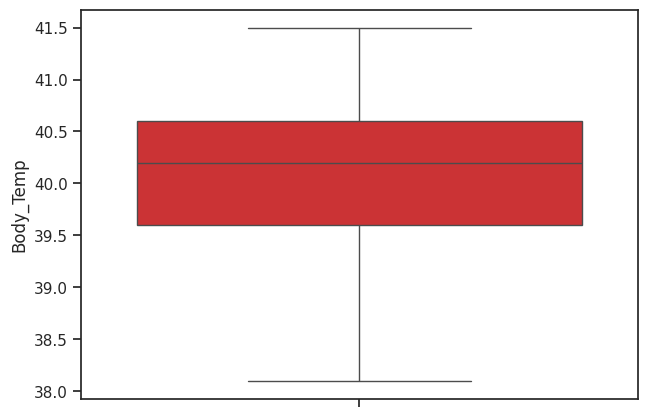

In [34]:
sns.boxplot(df['Body_Temp'])

<Axes: >

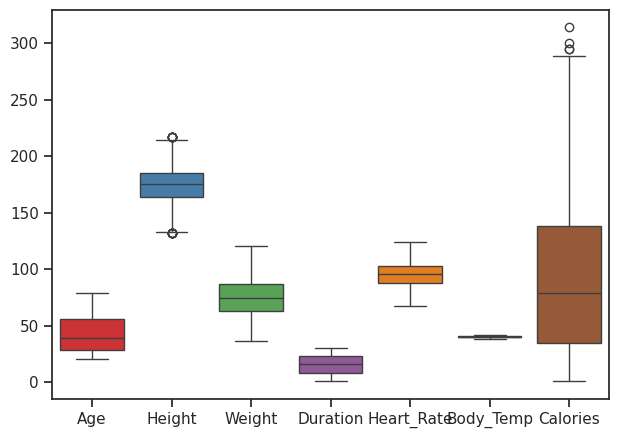

In [35]:
sns.boxplot(df)

### Handling Categorical Values:

In [36]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,female,67,176.0,74.0,12.0,103.0,39.6,76.0
1,female,34,178.0,79.0,19.0,96.0,40.6,93.0
2,female,38,178.0,77.0,14.0,82.0,40.5,49.0
3,female,39,169.0,66.0,8.0,90.0,39.6,36.0
4,male,23,169.0,73.0,25.0,102.0,40.7,122.0


In [37]:
df['Gender'].value_counts()

,count
Gender,
female,7553
male,7447


In [38]:
df['Gender'].value_counts().to_dict()

{'female': 7553, 'male': 7447}

In [39]:
df.replace({'female': 0, 'male': 1}, inplace=True)

In [40]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,67,176.0,74.0,12.0,103.0,39.6,76.0
1,0,34,178.0,79.0,19.0,96.0,40.6,93.0
2,0,38,178.0,77.0,14.0,82.0,40.5,49.0
3,0,39,169.0,66.0,8.0,90.0,39.6,36.0
4,1,23,169.0,73.0,25.0,102.0,40.7,122.0


## Split the Data

In [41]:
x = df.drop(['Calories'], axis=1)
y = df['Calories']

### Train-Test-Split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

### Scaling

In [43]:
std_scaler = StandardScaler()
array1 = std_scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(array1, columns=x_train.columns)
# print(x_train_scaled)

array2 = std_scaler.transform(x_test)
x_test_scaled = pd.DataFrame(array2, columns=x_test.columns)
x_test_scaled

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1.003339,-0.926240,0.244405,0.398395,-0.542389,0.054775,-0.041782
1,1.003339,-0.513473,0.033871,-0.202013,0.783697,0.997643,0.881825
2,-0.996672,-0.867273,-0.317020,-0.268725,0.301484,0.683354,0.222106
3,1.003339,0.076195,0.174227,0.131547,0.060377,-0.469040,0.617937
4,-0.996672,-1.103141,-0.948622,-1.002557,0.783697,1.102406,0.881825
...,...,...,...,...,...,...,...
2995,1.003339,1.786231,-0.387198,0.198259,1.265910,0.683354,1.145713
2996,1.003339,0.135162,1.297076,1.198939,-1.627369,-0.888092,-2.152885
2997,-0.996672,1.078630,-0.738088,-0.335437,1.627569,1.207169,1.277657
2998,-0.996672,0.135162,-0.597732,-0.802421,1.507016,2.673852,1.409601


## Model Building

## 1. Linear Regression

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)

LinearRegression()

In [45]:
# Training Data Evaluation
y_pred_train = lin_reg.predict(x_train_scaled)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE : ", mae)

r2_squared = r2_score(y_train, y_pred_train)
print("R2 Score :", r2_squared)

MSE:  126.65226318155874
RMSE:  11.253988767612963
MAE :  8.29518379653785
R2 Score : 0.9671190726941826


In [46]:
# Testing Data Evaluation
y_pred_test = lin_reg.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE : ", mae)

r2_squared = r2_score(y_test, y_pred_test)
print("R2 Score :", r2_squared)

MSE:  135.85237539220216
RMSE:  11.655572718326722
MAE :  8.553078691260056
R2 Score : 0.9668008165513172


## 2. KNN

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [49]:
# Training Data Evaluation
y_pred_train = knn_model.predict(x_train_scaled)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE : ", mae)

r2_squared = r2_score(y_train, y_pred_train)
print("R2 Score :", r2_squared)

MSE:  18.47158666666667
RMSE:  4.29785838141122
MAE :  3.1515999999999997
R2 Score : 0.9952044844430525


In [50]:
# Testing Data Evaluation
y_pred_test = knn_model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE : ", mae)

r2_squared = r2_score(y_test, y_pred_test)
print("R2 Score :", r2_squared)

MSE:  27.74686666666667
RMSE:  5.267529465192071
MAE :  3.872866666666666
R2 Score : 0.9932193065161106


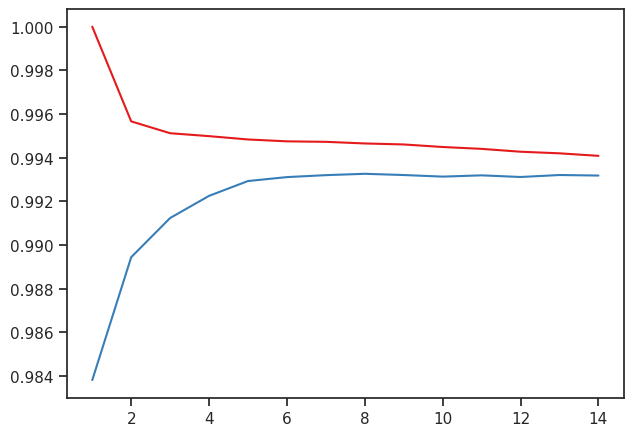

In [51]:
# Ploting for p=1:
k_values = range(1,15)
training_accuracy_list = []
testing_accuracy_list = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k, p=1)
    knn_model.fit(x_train_scaled, y_train)
    training_accuracy_list.append(knn_model.score(x_train_scaled, y_train))
    testing_accuracy_list.append(knn_model.score(x_test_scaled, y_test))

plt.plot(k_values, training_accuracy_list)
plt.plot(k_values, testing_accuracy_list)

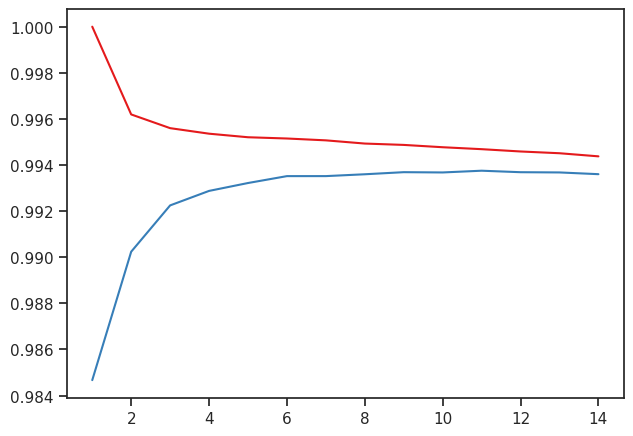

In [52]:
# Plotting for p=2:
k_values = range(1,15)
training_acc_list = []
testing_acc_list = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k, p=2)
    knn_model.fit(x_train_scaled, y_train)
    training_acc_list.append(knn_model.score(x_train_scaled, y_train))
    testing_acc_list.append(knn_model.score(x_test_scaled, y_test))

plt.plot(k_values, training_acc_list)
plt.plot(k_values, testing_acc_list)

## 3. Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [54]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train_scaled, y_train)

DecisionTreeRegressor()

In [55]:
# Training Data Evaluation
y_pred_train = dt_reg.predict(x_train_scaled)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE : ", mae)

r2_squared = r2_score(y_train, y_pred_train)
print("R2 Score :", r2_squared)

MSE:  0.0
RMSE:  0.0
MAE :  0.0
R2 Score : 1.0


In [56]:
# Testing Data Evaluation
y_pred_test = dt_reg.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE : ", mae)

r2_squared = r2_score(y_test, y_pred_test)
print("R2 Score :", r2_squared)

MSE:  29.825
RMSE:  5.461226968365259
MAE :  3.5316666666666667
R2 Score : 0.9927114587176089


#### HyperParameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [58]:
param_grid = { 'criterion' : ['squared_error', 'absolute_error'],
               'max_depth' : range(4,10),
               'min_samples_split' : range(8,16),
               'min_samples_leaf' : range(4,10)
             }

In [59]:
gscv_dt_reg =GridSearchCV(dt_reg, param_grid = param_grid, cv=4, n_jobs=-1, verbose=1)
gscv_dt_reg.fit(x_train_scaled, y_train)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': range(4, 10),
                         'min_samples_leaf': range(4, 10),
                         'min_samples_split': range(8, 16)},
             verbose=1)

In [60]:
gscv_dt_reg.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=9)

In [61]:
dt_reg = DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=10)
dt_reg.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=10)

In [62]:
# Training Data Evaluation
y_pred_train = dt_reg.predict(x_train_scaled)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE : ", mae)

r2_squared = r2_score(y_train, y_pred_train)
print("R2 Score :", r2_squared)

MSE:  26.47097481657824
RMSE:  5.144995123085953
MAE :  3.62635286960246
R2 Score : 0.9931277169724926


In [63]:
# Testing Data Evaluation
y_pred_test = dt_reg.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE : ", mae)

r2_squared = r2_score(y_test, y_pred_test)
print("R2 Score :", r2_squared)

MSE:  44.37025369648281
RMSE:  6.661100036516702
MAE :  4.668142931785243
R2 Score : 0.9891569345925572


In [64]:
dt_reg.feature_importances_

array([7.33136399e-03, 2.51070859e-02, 1.26378858e-04, 1.70552027e-03,
       9.19241935e-01, 4.64762932e-02, 1.14222996e-05])

<Axes: >

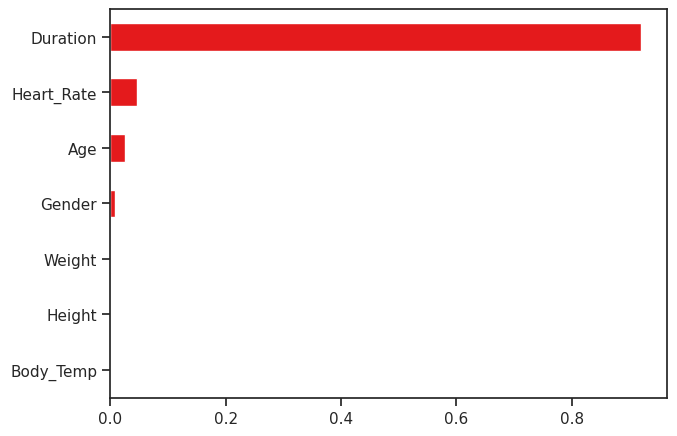

In [65]:
s1 = pd.Series(dt_reg.feature_importances_, index=x.columns)
s1.sort_values().plot(kind='barh')

#### 5. Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf_model = RandomForestRegressor(bootstrap=True, oob_score=True, random_state=35, n_jobs=-1, verbose=1)
rf_model.fit(x_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=35, verbose=1)

In [68]:
# Training Data Evaluation
y_pred_train = rf_model.predict(x_train_scaled)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE : ", mae)

r2_squared = r2_score(y_train, y_pred_train)
print("R2 Score :", r2_squared)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


MSE:  1.1668574166666668
RMSE:  1.080211746217688
MAE :  0.6764816666666668
R2 Score : 0.9996970653904647


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


In [69]:
# Testing Data Evaluation
y_pred_test = rf_model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE : ", mae)

r2_squared = r2_score(y_test, y_pred_test)
print("R2 Score :", r2_squared)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


MSE:  8.770689133333333
RMSE:  2.9615349286026214
MAE :  1.8478933333333332
R2 Score : 0.9978566461081871


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [70]:
rf_model.oob_score_

0.9977747690650217

In [71]:
rf_model.feature_importances_

array([6.75882645e-03, 2.65086929e-02, 1.26004717e-03, 3.10276916e-03,
       9.13832113e-01, 4.80649254e-02, 4.72625516e-04])

<Axes: >

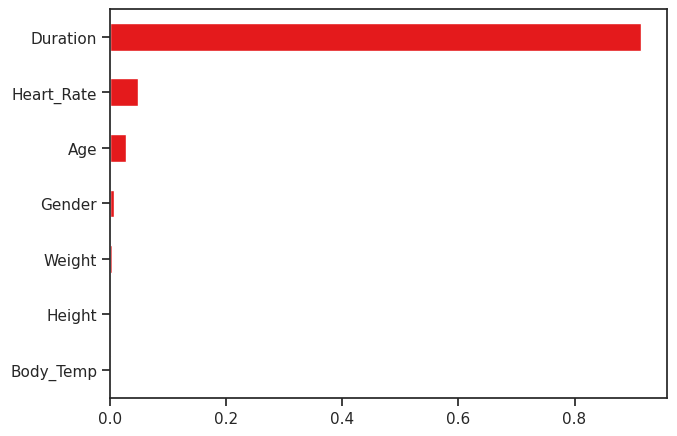

In [72]:
s1=pd.Series(rf_model.feature_importances_, index=x.columns)
s1.sort_values().plot(kind='barh')

### 6. AdaBoost

In [73]:
from sklearn.ensemble import AdaBoostRegressor

In [74]:
adb_reg = AdaBoostRegressor()
adb_reg.fit(x_train_scaled, y_train)

AdaBoostRegressor()

In [75]:
# Training Data Evaluation
y_pred_train = adb_reg.predict(x_train_scaled)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE : ", mae)

r2_squared = r2_score(y_train, y_pred_train)
print("R2 Score :", r2_squared)

MSE:  137.9615370505077
RMSE:  11.74570291853611
MAE :  9.382249426888977
R2 Score : 0.9641830066293116


In [76]:
# Testing Data Evaluation
y_pred_test = adb_reg.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE : ", mae)

r2_squared = r2_score(y_test, y_pred_test)
print("R2 Score :", r2_squared)

MSE:  141.21100024115802
RMSE:  11.883223478549834
MAE :  9.3347941138557
R2 Score : 0.9654912923793655


In [77]:
# Saving StandardScaler
import pickle

with open('rf_model.pkl', 'wb') as f:
  pickle.dump(rf_model, f)

In [79]:
#
import json

column_data = {

               'Gender' : {'female': 0, 'male': 1}
}


with open('column_data.json', 'w') as f:
  json.dump(column_data, f)

In [83]:
rf_model.predict(x_test_scaled[22:23])[0]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


90.22

In [82]:
y_test[22:23]

,Calories
2991,90.0


In [84]:
x.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')